In [64]:
import pandas as pd
import requests
import json
import numpy as np
from scipy import signal
from datetime import datetime

In [65]:
# inflation = pd.read_csv('inflation.csv')
# inflation = inflation.astype({'Year':'int'})
# inflation = inflation.drop(['HALF1', 'HALF2'], axis=1)
# inflation

In [70]:
# # Create dictionary to map month names to numbers
# months = {
#     'Jan': 1, 
#     'Feb': 2,
#     'Mar': 3,
#     'Apr': 4,
#     'May': 5,
#     'Jun': 6,
#     'Jul': 7,
#     'Aug': 8,
#     'Sep': 9,
#     'Oct': 10,
#     'Nov': 11,
#     'Dec': 12
# }

# # Melting the DataFrame to combine month columns into 'Month' and 'Value' columns
# inflation = pd.melt(inflation, id_vars=['Year'], var_name='Month', value_name='INFLATION')

# # Creating the 'DATE' column by combining 'YEAR', 'Month', and '01'
# inflation['DATE'] = pd.to_datetime(inflation['Year'].astype(str) + '-' + inflation['Month'] + '-01')

# # Dropping the 'YEAR' and 'Month' columns if not needed anymore
# inflation.drop(columns=['Year', 'Month'], inplace=True)

# inflation.dropna(inplace=True)

# inflation.sort_values(by=['DATE'], inplace=True)

# inflation['DATE'] = pd.to_datetime(inflation['DATE'], format='%Y-%m-%d')

# inf = inflation.pop('INFLATION')
# inflation['INFLATION'] = inf

# inflation.sort_values(by=['DATE'], inplace=True)
# inflation.reset_index(drop=True, inplace=True)

# inflation.head(10)

In [71]:
# cpi = pd.read_csv('PCEPILFE.csv')
# cpi['PCEPILFE'] = cpi['PCEPILFE'] - 100.00
# cpi['DATE'] = pd.to_datetime(cpi['DATE'])
# cpi.sort_values(by=['DATE'], inplace=True)
# cpi.reset_index(drop=True, inplace=True)
# cpi.head(10)

In [72]:
period_map = {'January' : 1, 'February': 2, 'March' : 3, 'April' : 4, 'May' : 5, 'June' : 6, 'July' : 7, 'August' : 8, 'September' : 9, 'October' : 10, 'November' : 11, 'December' : 12}

In [73]:
# Chained CPI for All Urban Consumers, U.S. city average (C-CPI-U)
# Series Id: SUUR0000SA0L1E
# Not Seasonally Adjusted
# Series Title: All items less food and energy in U.S. city average, all urban consumers, chained, not seasonally adjusted
# Area: U.S. city average
# Item: All items less food and energy
# Base Period: DECEMBER 1999=100
    
headers = {'Content-type': 'application/json'}
series_id = ['SUUR0000SA0L1E']
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

cpi_resp_json = []
for year in [(2000, 2010), (2011, 2021), (2022, 2024)]:
    start_year = year[0]
    end_year = year[1]

    data = json.dumps({"seriesid": series_id,"startyear":str(start_year), "endyear":str(end_year)})

    print(f'Start Year: {start_year}, End Year: {end_year}, Sending...')
    res = requests.post(url, data=data, headers=headers)
    print(f'Status: {res.status_code}')
    
    json_data = res.json()
    cpi_resp_json.append(json_data)

Start Year: 2000, End Year: 2010, Sending...
Status: 200
Start Year: 2011, End Year: 2021, Sending...
Status: 200
Start Year: 2022, End Year: 2024, Sending...
Status: 200


In [146]:
cpi = pd.DataFrame(columns = ["DATE","CPI"])
for json_data in cpi_resp_json:
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
        for item in series['data']:
            year = item['year']
            value = item['value']
            periodName = item['periodName']
            period = period_map[periodName]
            cpi.loc[len(cpi.index)] = [str(year) + '-' + str(period) + '-01', float(value)]

cpi['CPI'] = cpi['CPI'] - 100.0
cpi['DATE'] = pd.to_datetime(unrate['DATE'], format='%Y-%m-%d')
cpi.sort_values(by=['DATE'], inplace=True)
cpi.reset_index(drop=True, inplace=True)
print(len(cpi))
cpi.tail(n=10)

260


,DATE,CPI
250,2022-11-01,56.450
251,2022-12-01,55.979
252,2023-01-01,55.210
253,2023-02-01,54.531
254,2023-03-01,54.155
255,2023-04-01,53.265
256,2023-05-01,52.297
257,2023-06-01,51.419
258,2023-07-01,50.737
259,2023-08-01,49.710


In [78]:
# Labor Force Statistics from the Current Population Survey

# Series Id: LNS14000000
# Seasonally Adjusted
# Series title: (Seas) Unemployment Rate
# Labor force status: Unemployment rate
# Type of data: Percent or rate
# Age: 16 years and over
    
headers = {'Content-type': 'application/json'}
series_id = ['LNS14000000']
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

unemp_resp_json = []
for year in [(2000, 2010), (2011, 2021), (2022, 2024)]:
    start_year = year[0]
    end_year = year[1]

    data = json.dumps({"seriesid": series_id,"startyear":str(start_year), "endyear":str(end_year)})

    print(f'Start Year: {start_year}, End Year: {end_year}, Sending...')
    res = requests.post(url, data=data, headers=headers)
    print(f'Status: {res.status_code}')
    
    json_data = res.json()
    unemp_resp_json.append(json_data)


Start Year: 2000, End Year: 2010, Sending...
Status: 200
Start Year: 2011, End Year: 2021, Sending...
Status: 200
Start Year: 2022, End Year: 2024, Sending...
Status: 200


In [79]:
unrate = pd.DataFrame(columns = ["DATE","UNEMPLOYMENT"])
for json_data in unemp_resp_json:
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
        for item in series['data']:
            year = item['year']
            value = item['value']
            periodName = item['periodName']
            period = period_map[periodName]
            unrate.loc[len(unrate.index)] = [str(year) + '-' + str(period) + '-01', float(value)]
            
unrate['DATE'] = pd.to_datetime(unrate['DATE'], format='%Y-%m-%d')
unrate.sort_values(by=['DATE'], inplace=True)
unrate.reset_index(drop=True, inplace=True)
print(len(unrate))
unrate.head(n=10)

260


,DATE,UNEMPLOYMENT
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0
5,2000-06-01,4.0
6,2000-07-01,4.0
7,2000-08-01,4.1
8,2000-09-01,3.9
9,2000-10-01,3.9


In [81]:
headers = {'Content-type': 'application/json'}
start_date = '2000-01-01'
end_date = '2023-08-15'
search_type='rate'
url = 'https://markets.newyorkfed.org/api/rates/unsecured/effr/search.json'
data = {"startDate":start_date, "endDate":end_date, 'type':search_type}

months_seen = dict()

print(f'Start Date: {start_date}, End Date: {end_date}, Sending...')
res = requests.get(url, params=data, headers=headers)
print(f'Status: {res.status_code}')

effr_resp_json = res.json()
effr = pd.DataFrame(columns = ["DATE","EFFR"])
for r in effr_resp_json['refRates']:
    effectiveDate = r['effectiveDate']
    sd = datetime.strptime(effectiveDate, '%Y-%m-%d')
    YYYY_MM = str(sd.year) + '-' + str(sd.month)
    if YYYY_MM not in months_seen.keys():
        months_seen[YYYY_MM] = 1
        percentRate = r['percentRate']
        effectiveDate = YYYY_MM + '-01'
        effr.loc[len(effr.index)] = [effectiveDate, float(percentRate)]

effr['DATE'] = pd.to_datetime(effr['DATE'], format='%Y-%m-%d')
effr.sort_values(by=['DATE'], inplace=True)
effr.reset_index(drop=True, inplace=True)
print(len(effr))
effr.head(n=10)

Start Date: 2000-01-01, End Date: 2023-08-15, Sending...
Status: 200
278


,DATE,EFFR
0,2000-07-01,6.64
1,2000-08-01,6.65
2,2000-09-01,6.60
3,2000-10-01,6.59
4,2000-11-01,6.62
5,2000-12-01,5.41
6,2001-01-01,5.74
7,2001-02-01,5.59
8,2001-03-01,5.29
9,2001-04-01,4.67


In [82]:
effr_quarterly = effr.loc[effr['DATE'].dt.month.isin([3, 6, 9, 12])]
effr_quarterly = effr_quarterly.sort_values(by=['DATE'])
effr_quarterly = effr_quarterly.reset_index(drop=True)
effr_quarterly.head()

,DATE,EFFR
0,2000-09-01,6.60
1,2000-12-01,5.41
2,2001-03-01,5.29
3,2001-06-01,3.95
4,2001-09-01,2.75


In [152]:
print(len(effr))
effr.tail()

278


,DATE,EFFR
273,2023-04-01,4.83
274,2023-05-01,5.08
275,2023-06-01,5.08
276,2023-07-01,5.33
277,2023-08-01,5.33


In [153]:
print(len(cpi))
cpi.tail()

260


,DATE,CPI
255,2023-04-01,53.265
256,2023-05-01,52.297
257,2023-06-01,51.419
258,2023-07-01,50.737
259,2023-08-01,49.710


In [154]:
print(len(unrate))
unrate.tail()

260


,DATE,UNEMPLOYMENT
255,2023-04-01,3.4
256,2023-05-01,3.7
257,2023-06-01,3.6
258,2023-07-01,3.5
259,2023-08-01,3.8


In [161]:
merged = unrate.merge(cpi, on='DATE')
merged = merged.merge(effr, on='DATE')

unrate_col = merged.pop('UNEMPLOYMENT')
effr_col = merged.pop('EFFR')

merged['UNEMPLOYMENT'] = unrate_col
merged['EFFR'] = effr_col

merged.dropna(inplace=True)
print(len(merged))
merged.tail()

254


,DATE,CPI,UNEMPLOYMENT,EFFR
249,2023-04-01,53.265,3.4,4.83
250,2023-05-01,52.297,3.7,5.08
251,2023-06-01,51.419,3.6,5.08
252,2023-07-01,50.737,3.5,5.33
253,2023-08-01,49.710,3.8,5.33


In [165]:
merged2 = pd.melt(merged, id_vars=['DATE'], var_name=['SIGNAL'], value_name='VALUE', ignore_index = False)
merged2.sort_values(by=['DATE'], inplace=True)
merged2.reset_index(drop=True, inplace=True)
print(len(merged2))
merged2.tail(n=10)

762


,DATE,SIGNAL,VALUE
752,2023-05-01,CPI,52.297
753,2023-06-01,UNEMPLOYMENT,3.600
754,2023-06-01,EFFR,5.080
755,2023-06-01,CPI,51.419
756,2023-07-01,EFFR,5.330
757,2023-07-01,CPI,50.737
758,2023-07-01,UNEMPLOYMENT,3.500
759,2023-08-01,UNEMPLOYMENT,3.800
760,2023-08-01,CPI,49.710
761,2023-08-01,EFFR,5.330


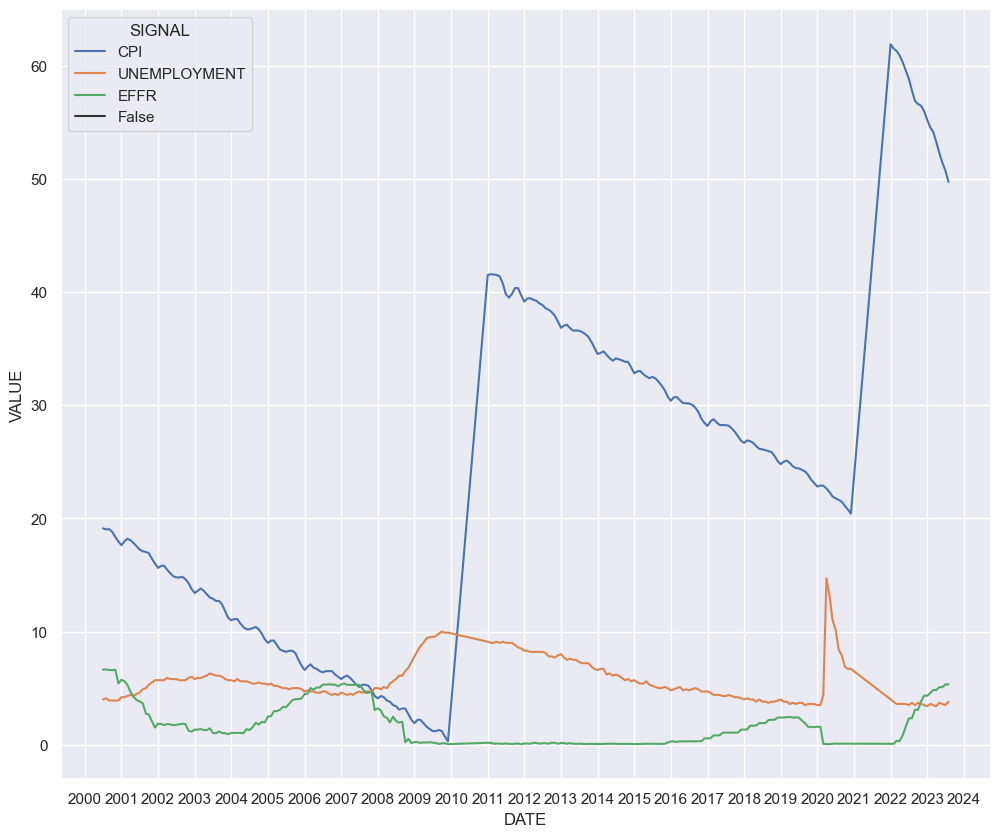

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

sns.set(rc={'figure.figsize':(12 , 10)})

sns.lineplot(data=merged2, x='DATE', y='VALUE', hue='SIGNAL', style=False, dashes=True)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

<Axes: xlabel='EFFR', ylabel='CPI'>

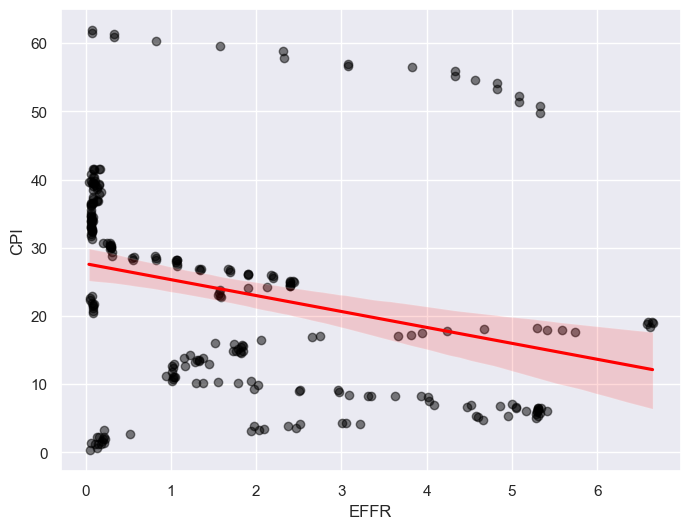

In [167]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(x = merged['EFFR'], y = merged['CPI'],
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

In [266]:
x = merged['EFFR']
y = merged['CPI']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

-162

In [263]:
x = merged['EFFR']
y = merged['UNEMPLOYMENT']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

-34

In [264]:
x = merged['CPI']
y = merged['UNEMPLOYMENT']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

11

In [260]:
import numpy as np
from scipy import signal
rng = np.random.default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(100), x])
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

-100

In [ ]:
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_effr_cpi = ccf_values(merged['EFFR'], merged['CPI'])

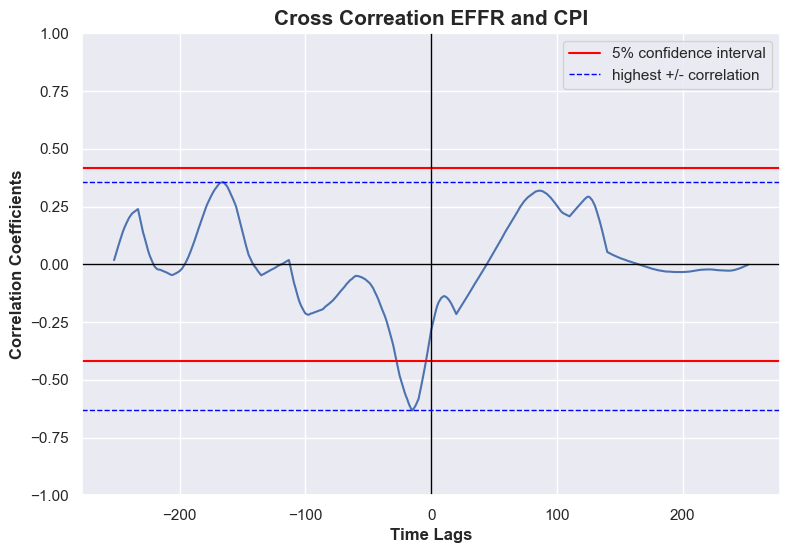

In [254]:
lags = signal.correlation_lags(len(merged['EFFR']), len(merged['CPI']))
def ccf_plot(lags, ccf):
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, 
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, 
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation EFFR and CPI', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', 
    fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_effr_cpi)

In [173]:
merged['PCT_EFFR_CHANGE'] = merged['EFFR'].pct_change()
merged['PCT_CPI_CHANGE'] = merged['CPI'].pct_change()
merged['PCT_UNEMPLOYMENT_CHANGE'] = merged['UNEMPLOYMENT'].pct_change()
merged.dropna(inplace=True)

In [174]:
merged

,DATE,CPI,UNEMPLOYMENT,EFFR,PCT_EFFR_CHANGE,PCT_CPI_CHANGE,PCT_UNEMPLOYMENT_CHANGE
1,2000-08-01,19.023,4.1,6.65,0.001506,-0.004813,0.025000
2,2000-09-01,19.040,3.9,6.60,-0.007519,0.000894,-0.048780
3,2000-10-01,18.807,3.9,6.59,-0.001515,-0.012237,0.000000
4,2000-11-01,18.348,3.9,6.62,0.004552,-0.024406,0.000000
5,2000-12-01,17.954,3.9,5.41,-0.182779,-0.021474,0.000000
...,...,...,...,...,...,...,...
249,2023-04-01,53.265,3.4,4.83,0.000000,-0.016434,-0.028571
250,2023-05-01,52.297,3.7,5.08,0.051760,-0.018173,0.088235
251,2023-06-01,51.419,3.6,5.08,0.000000,-0.016789,-0.027027
252,2023-07-01,50.737,3.5,5.33,0.049213,-0.013264,-0.027778


In [243]:
import numpy as np

from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure, show

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

dates = np.array(merged['DATE'], dtype=np.datetime64)
effr_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR']))
cpi_src = ColumnDataSource(data=dict(date=dates, rate=merged['CPI']))
unemp_src = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT']))

p = figure(height=300, sizing_mode='stretch_width', tools="xpan", toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(dates[0], dates[50]),)

p.line('date', 'rate', source=effr_src, color='blue', legend_label='Federal Funds Effective Rate')
p.line('date', 'rate', source=cpi_src, color='red', legend_label='Chained CPI for All Urban Consumers')
p.line('date', 'rate', source=unemp_src, color='green', legend_label='Unemployment Rate')
p.yaxis.axis_label = 'Rate'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                toolbar_location=None, background_fill_color="#efefef")

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

select.line('date', 'rate', source=effr_src, color='blue')
select.line('date', 'rate', source=cpi_src, color='red')
select.line('date', 'rate', source=unemp_src, color='green')
select.ygrid.grid_line_color = None
select.add_tools(range_tool)

show(column(p, select))

<Axes: xlabel='EFFR', ylabel='CPI'>

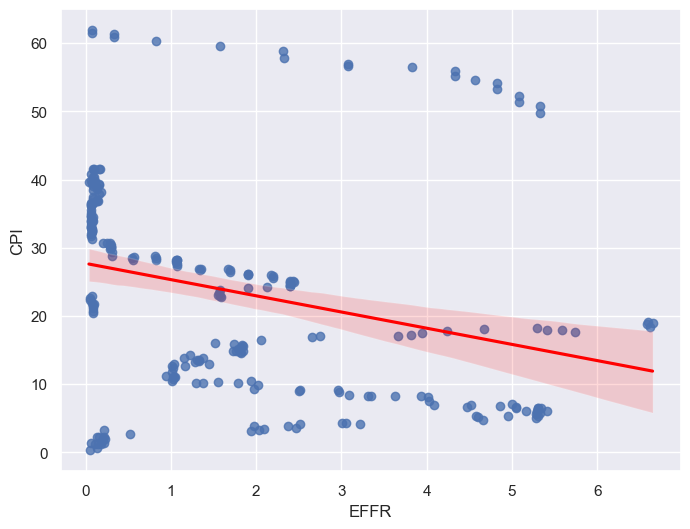

In [175]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(x = merged['EFFR'], y = merged['CPI'],
#             scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

<Axes: xlabel='EFFR', ylabel='UNEMPLOYMENT'>

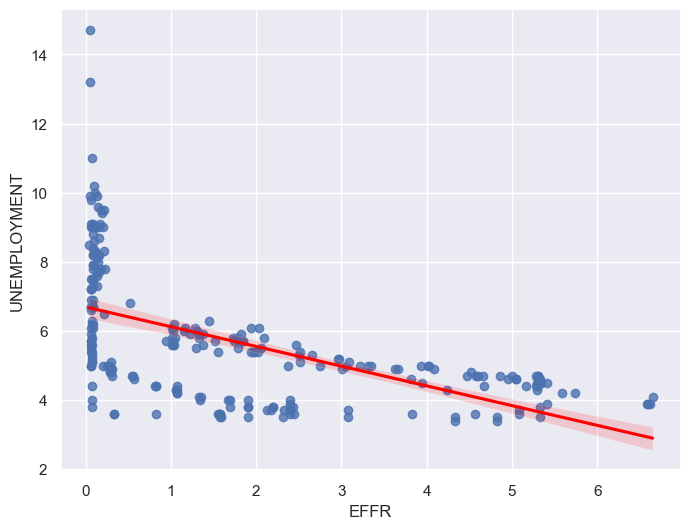

In [177]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(x = merged['EFFR'], y = merged['UNEMPLOYMENT'],
#             scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

In [178]:
merged['EFFR'].corr(merged['CPI'])
# merged['PCT_EFFR_CHANGE'].corr(merged['PCT_CPI_CHANGE'])

-0.2864234824526276

In [179]:
merged['EFFR'].corr(merged['UNEMPLOYMENT'])

-0.5627954588620241

In [180]:
ccf_effr_cpi = ccf_values(merged['EFFR'], merged['CPI'])
# ccf_effr_cpi

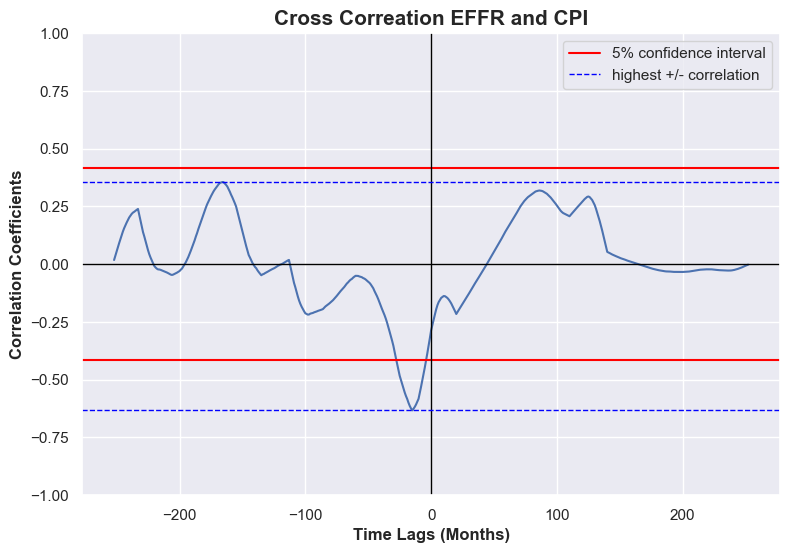

In [181]:
lags = signal.correlation_lags(len(merged['EFFR']), len(merged['CPI']))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation EFFR and CPI', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags (Months)', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_effr_cpi)